Задание 1

In [ ]:
import numpy as np

In [ ]:
def sliding_window(data, w, step):
    ans = []
    for i in range(0, len(data) - w + 1, step):
        window = data[i:i+w]
        ans.append(window)
    return ans

In [ ]:
window = 3
step_s = 1
x1 = np.array([8, 1, 4, 5, -2, 5, 9, 0])
A1 = np.array([[8, 1, 4],
               [1, 4, 5],
               [4, 5, -2],
               [5, -2, 5],
               [-2, 5, 9],
               [5, 9, 0]])
print(np.array_equal(sliding_window(x1, w=window, step=step_s),A1))

window = 2
step_s = 4
x2 = np.array([8, 3, 4, 1, -6, 5, 9, 2, 10, 11, -14, 0])
A2 = np.array([[8, 3],
               [-6, 5],
               [10, 11]])
print(np.array_equal(sliding_window(x2, w=window, step=step_s),A2))

True
True


In [ ]:
import pandas as pd

In [ ]:
data = pd.DataFrame(pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names=["age", "workclass", "fnlwgt", "education",
                    "education-num", "marital-status", "occupation", "relationship",
                    "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"]))


In [ ]:
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Задание 2 пункт 1

In [ ]:
data.groupby("sex").size()

,0
sex,
Female,10771
Male,21790


<Axes: >

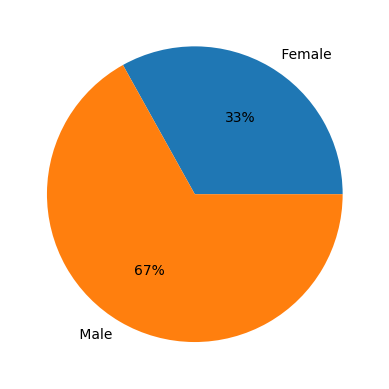

In [ ]:
data.groupby("sex").size().plot.pie(autopct='%1.0f%%')

Задание 2 пункт 2

In [ ]:
data.groupby("sex")["age"].mean().round(2)

,age
sex,
Female,36.86
Male,39.43


<Axes: xlabel='sex'>

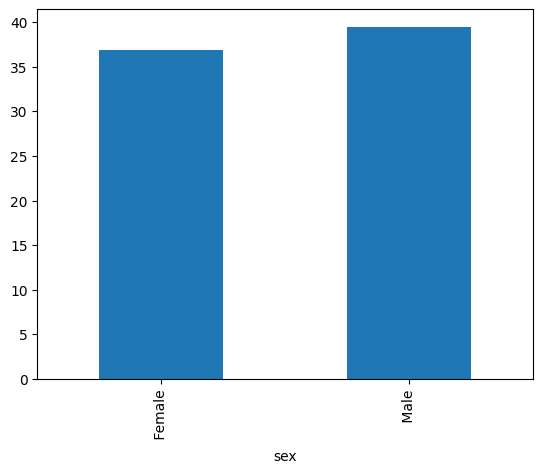

In [ ]:
data.groupby("sex")["age"].mean().round(2).plot.bar()

Задание 2 пункт 3

In [ ]:
table = data.loc[data["native-country"] == ' Germany']

In [ ]:
table.shape[0] / data.shape[0]*100

0.42074874850281013

Задание 2 пункт 4

<Axes: xlabel='education'>

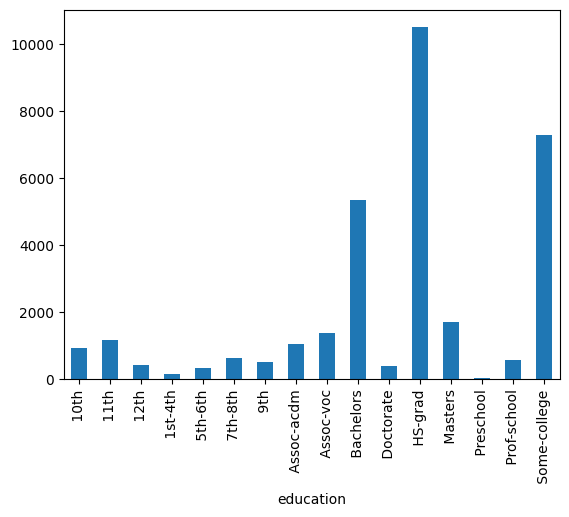

In [ ]:
data.groupby("education").size().plot.bar()

Задание 2 пункт 5

In [ ]:
table = data.query("salary == ' <=50K'").describe()['age']
table.loc[['mean','std']]

,age
mean,36.783738
std,14.020088


Задание 2 пункт 6

<Axes: xlabel='education'>

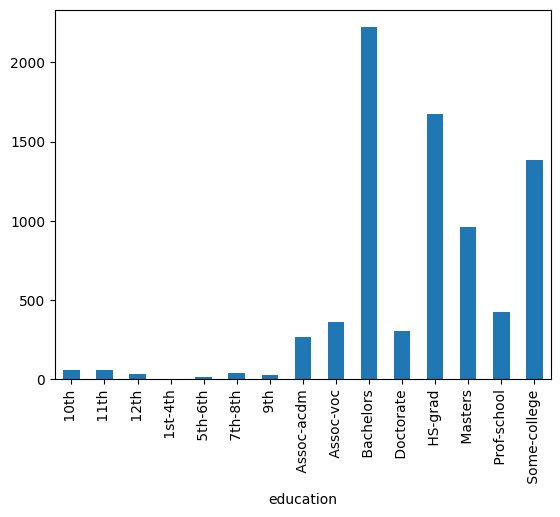

In [ ]:
data.query("salary == ' >50K'").groupby('education').size().plot.bar()
#Ответ: нет

Задание 2 пункт 7

In [ ]:
data.groupby(['sex', 'race']).age.describe()

count       mean        std   min   25%   50%  \
sex     race                                                                   
 Female  Amer-Indian-Eskimo    119.0  37.117647  13.114991  17.0  27.0  36.0   
         Asian-Pac-Islander    346.0  35.089595  12.300845  17.0  25.0  33.0   
         Black                1555.0  37.854019  12.637197  17.0  28.0  37.0   
         Other                 109.0  31.678899  11.631599  17.0  23.0  29.0   
         White                8642.0  36.811618  14.329093  17.0  25.0  35.0   
 Male    Amer-Indian-Eskimo    192.0  37.208333  12.049563  17.0  28.0  35.0   
         Asian-Pac-Islander    693.0  39.073593  12.883944  18.0  29.0  37.0   
         Black                1569.0  37.682600  12.882612  17.0  27.0  36.0   
         Other                 162.0  34.654321  11.355531  17.0  26.0  32.0   
         White               19174.0  39.652498  13.436029  17.0  29.0  38.0   

                               75%   max  
sex     race                              
 Female  Amer-Indian-Eskimo  46.00  80.0  
         Asian-Pac-Islander  43.75  75.0  
         Black               46.00  90.0  
         Other               39.00  74.0  
         White               46.00  90.0  
 Male    Amer-Indian-Eskimo  45.00  82.0  
         Asian-Pac-Islander  46.00  90.0  
         Black               46.00  90.0  
         Other               42.00  77.0  
         White               49.00  90.0

In [ ]:
table = data[["age","sex","race"]]
max_age = table.query('sex ==" Male" & race == " Amer-Indian-Eskimo"').describe().loc["max"]
print(f"Максимальный возраст мужчины расы Amer-Indian-Eskimo {max_age}")

Максимальный возраст мужчины расы Amer-Indian-Eskimo age    82.0
Name: max, dtype: float64


Задание 2 пункт 8

In [ ]:
table = data.query("salary == ' >50K' & sex == ' Male'")

In [ ]:
married = sum(table.groupby("marital-status").size().loc[[" Married-AF-spouse"," Married-civ-spouse"," Married-spouse-absent"]])

In [ ]:
not_married = sum(table.groupby("marital-status").size())-sum(table.groupby("marital-status").size().loc[[" Married-AF-spouse"," Married-civ-spouse"," Married-spouse-absent"]])

In [ ]:
if(married > not_married):
  print("married > not_married")
else:
  print("not_married > married")

married > not_married


Задание 2 пункт 9

In [ ]:
max_hours_per_week = sorted(data['hours-per-week'].unique())[-1]
print(f'Максимальное число часов человек работает в неделю: {max_hours_per_week}')

Максимальное число часов человек работает в неделю: 99


In [ ]:
print(f'Человек, которые работают {max_hours_per_week} часов в неделю: {data[data["hours-per-week"] == max_hours_per_week].shape[0]}')

Человек, которые работают 99 часов в неделю: 85


<Axes: >

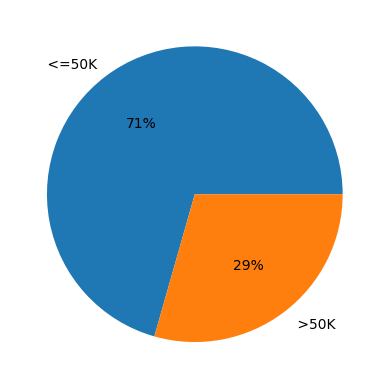

In [ ]:
data[data["hours-per-week"] == max_hours_per_week].groupby("salary").size().plot.pie(autopct='%1.0f%%')

Задание 2 пункт 10

In [ ]:
data.groupby(["native-country","salary"])["hours-per-week"].mean()

native-country  salary
 ?               <=50K    40.164760
                 >50K     45.547945
 Cambodia        <=50K    41.416667
                 >50K     40.000000
 Canada          <=50K    37.914634
                            ...    
 United-States   >50K     45.505369
 Vietnam         <=50K    37.193548
                 >50K     39.200000
 Yugoslavia      <=50K    41.600000
                 >50K     49.500000
Name: hours-per-week, Length: 82, dtype: float64

Задание 3

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/

Mounted at /content/drive/
/content/drive/My Drive


In [ ]:
data = pd.read_csv("edmonton_housing_data_Feb15_2022.csv")
data.columns

Index(['House Description', 'Price', 'Bedrooms', 'Bathrooms', 'Full Baths',
       'Square Footage', 'Acres', 'Year Built', 'Type', 'Sub-Type', 'Style',
       'Address', 'Area', 'Community', 'Condo', 'City', 'County', 'Province',
       'Postal Code', 'Features', 'Parking Spaces', 'Parking', 'Is Waterfront',
       'Has Pool', 'Interior', 'Interior Features', 'Heating', 'Fireplace',
       '# of Stories', 'Has Basement', 'Basement', 'Separate Entrance',
       'Exterior', 'Exterior Features', 'Construction', 'Foundation',
       'Elementary', 'Middle', 'High', 'Foreclosure', 'RE / Bank Owned',
       'Office', 'Bedrooms Above Grade', '# of Garages', 'Garages',
       'Half Baths', 'Fireplaces', 'Zoning', 'Lot Description', 'HOA Fees',
       'HOA Fees Freq.', 'Condo Fee'],
      dtype='object')

In [ ]:
data.dtypes

,0
House Description,object
Price,object
Bedrooms,int64
Bathrooms,float64
Full Baths,float64
Square Footage,object
Acres,float64
Year Built,int64
Type,object
Sub-Type,object


In [ ]:
data.head(4)

,House Description,Price,Bedrooms,Bathrooms,Full Baths,Square Footage,Acres,Year Built,Type,Sub-Type,...,Bedrooms Above Grade,# of Garages,Garages,Half Baths,Fireplaces,Zoning,Lot Description,HOA Fees,HOA Fees Freq.,Condo Fee
0,"Rare property on the market, house converted t...","$399,990",1,1.0,1.0,787,0.12,1948,Single Family,Residential Detached Single Family,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,This fantastic family home has an option to As...,"$357,000",4,2.0,2.0,929,0.15,1954,Single Family,Residential Detached Single Family,...,2.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"At over 1150 square feet, this Allendale 3+2 b...","$499,600",5,2.0,2.0,"1,161",0.14,1959,Single Family,Residential Detached Single Family,...,3.0,1,7.32x4.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gorgeous upgrades and a lower level suite in C...,"$398,800",4,3.0,3.0,"1,217",0.15,1976,Single Family,Residential Detached Single Family,...,3.0,2,24x26,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data['Price'] = data['Price'].str.replace('$','')
data['Price'] = data['Price'].str.replace(',','')
data['Price'] = data['Price'].astype('float')
data['Square Footage'] = data['Square Footage'].str.replace(',','')
data['Square Footage'] = data['Square Footage'].astype('float')

Первое: Описательные статистики для года постройки

In [ ]:
data['Year Built'].describe()

,Year Built
count,1697.000000
mean,1982.375958
std,27.726683
min,1900.000000
25%,1960.000000
50%,1979.000000
75%,2006.000000
max,2023.000000


Второе: Вывести среднюю стоимость (признак Price) домов, построенных в 1970-х

In [ ]:
table = data.set_index('Year Built')


In [ ]:
table.loc[range(1970, 1980),'Price'].mean()

257887.1793721973

Третье: Посмотреть на описательные статистики площади жилья (признак 'Square Footage') в домах, построенных в 1970-х и 2000-х

In [ ]:
table.loc[range(1970, 1980),'Square Footage'].describe()

,Square Footage
count,223.000000
mean,1168.829596
std,613.050097
min,34.000000
25%,884.500000
50%,1028.000000
75%,1217.000000
max,4809.000000


In [ ]:
table.loc[range(2000, 2010),'Square Footage'].describe()

,Square Footage
count,256.000000
mean,1163.593750
std,619.624857
min,515.000000
25%,860.750000
50%,1016.000000
75%,1160.750000
max,5196.000000


Четвёртое: В какой период в среднем стоимость (признак Price) жилья больше, в 70-х или 2000-х?

In [ ]:
seventies_mean = table.loc[range(1970, 1980),'Price'].mean()
two_thousands_mean = table.loc[range(2000, 2010),'Price'].mean()
print('семидесятые > двутысячные' if seventies_mean > two_thousands_mean else 'семидесятые < двутысячные')

семидесятые < двутысячные


Пятое: Какова максимальная площадь жилья (признак 'Square Footage') и каков год постройки этого дома

In [ ]:
print(table['Square Footage'].max(), table['Square Footage'].idxmax())

5371.0 1988


Шестое: Какое максимальное число ванных комнат (признак Bathrooms) в квартире построенной в 2010-х? Сколько домов построенных в 2010-х с таким количеством ванных комнат

In [ ]:
max_baths = table.loc[range(2010, 2020),'Bathrooms'].max()
print(max_baths)
sum(table.loc[range(2010, 2020),'Bathrooms'] == max_baths)

9.0


1

Седьмое: построить гистограмму количества ванных комнат (признак Bathrooms) в квартирах в домах, которые были построены с 2000 по 2022

<Axes: xlabel='Bathrooms'>

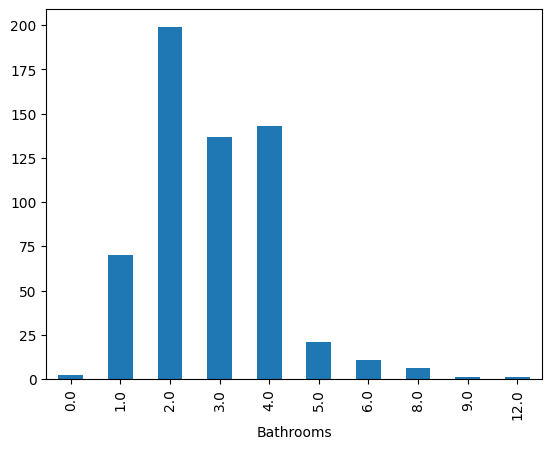

In [ ]:
table.loc[range(2000, 2023),:].groupby('Bathrooms').size().plot.bar()

Восьмое: Построить процентное соотношение количества ванных комнат (признак Bathrooms) в квартирах в домах, построенных в 2000 - 2017

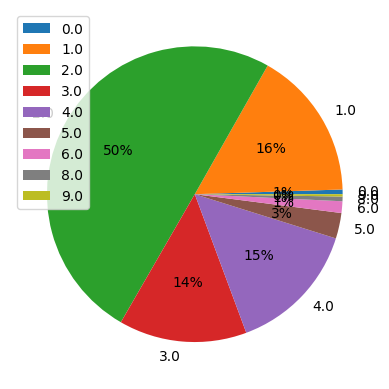

In [ ]:
table.loc[range(2000, 2018),:].groupby('Bathrooms').size().plot.pie(autopct='%1.0f%%')
plt.legend(labels = table.loc[range(2000, 2018),'Bathrooms'].unique().sort())

Девятое: Построить визуализацию количества квартир со стоимостью (признак Price) больше, чем 250000 в домах построенных в 70-е и в 2000-е

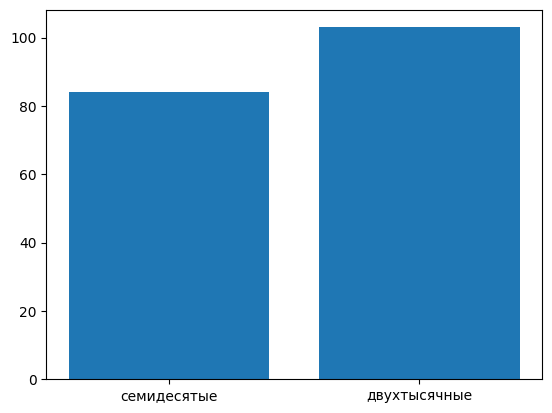

In [ ]:
y = [table.loc[range(1970, 1980),:].query('Price > 250000').shape[0], table.loc[range(2000, 2010),:].query('Price > 250000').shape[0]]
plt.bar(['семидесятые', 'двухтысячные'], y)
plt.show()

Десятое: Построить гистограммы количества гаражей (признак '# of Garages') в домах, построенных в 1980ых и 2010ых

<Axes: xlabel='# of Garages'>

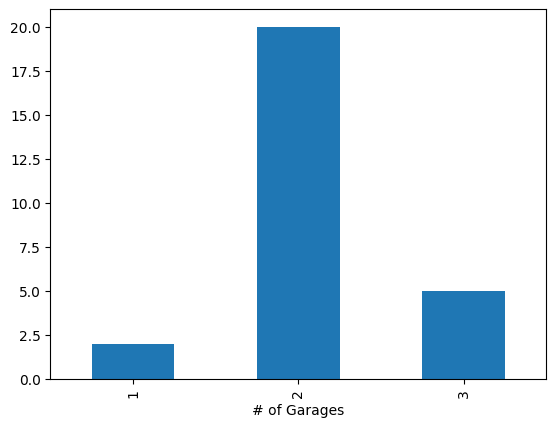

In [ ]:
table.loc[range(1980, 1990),:].groupby('# of Garages').size().plot.bar()

<Axes: xlabel='# of Garages'>

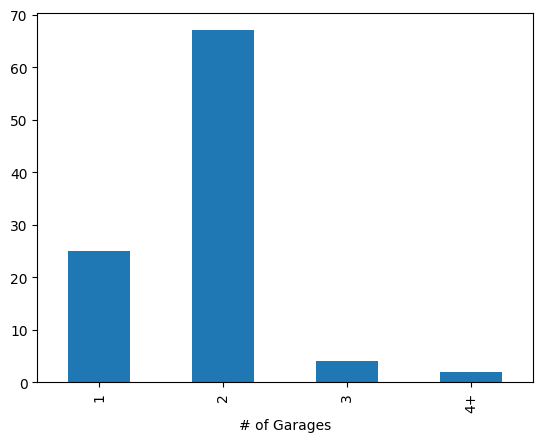

In [ ]:
table.loc[range(2010, 2020),:].groupby('# of Garages').size().plot.bar()